In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Amount of bacterial genomes

In [65]:
threshold_num_bac = 10.0 # a threshold on a number of bacterial genomes (try 1, 5 or 10)

In [239]:
num_bac_genomes = pd.read_csv("average_day7.txt", sep=" ")
num_bac_genomes = num_bac_genomes[num_bac_genomes['count'] > threshold_num_bac]
num_bac_genomes.reset_index(drop=True, inplace=True)

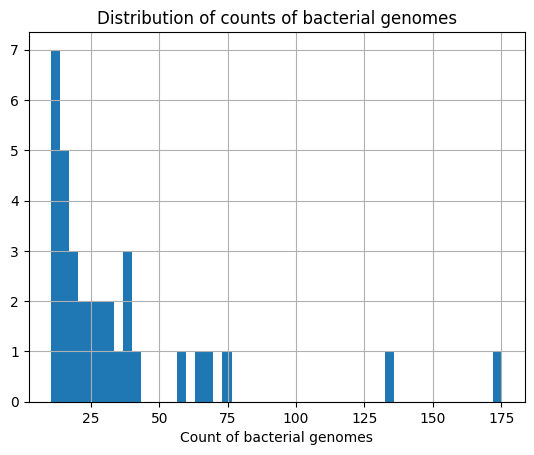

In [240]:
num_bac_genomes['count'].hist(bins=50)
plt.xlabel('Count of bacterial genomes')
plt.title('Distribution of counts of bacterial genomes')
plt.savefig('counts_distr.png', dpi=300)

In [241]:
num_bac_genomes.shape

(34, 2)

In [242]:
num_bac_genomes.head()

,genome,count
0,D300423:bin_000011,19.332085
1,D300423:bin_000014,38.665383
2,D300431:bin_000017,18.389941
3,D300432:bin_000002,134.314445
4,D300433:bin_000005,175.294258


In [243]:
multiplier_num_bac = 100 # multiplier for a total number of bacteria to be simulated 250 (300 K the best)
# 1 15 25 50 100 250 500
num_bac_genomes['count'] = [round(x) for x in num_bac_genomes['count'] * multiplier_num_bac]
total_num_bac = num_bac_genomes['count'].sum()

In [244]:
total_num_bac

119247

In [245]:
num_bac_genomes.head()

,genome,count
0,D300423:bin_000011,1933
1,D300423:bin_000014,3867
2,D300431:bin_000017,1839
3,D300432:bin_000002,13431
4,D300433:bin_000005,17529


In [152]:
num_bac_genomes.to_csv(f"NUM_BAC_MULTIPLIED_total_bac_{total_num_bac}_mult_{multiplier_num_bac}_thresh_{threshold_num_bac}.tsv", sep='\t', index=None)

### Functional distances

In [96]:
num_bac_genomes = pd.read_csv(f"NUM_BAC_MULTIPLIED_total_bac_119247_mult_100_thresh_10.0.tsv", sep='\t')

In [97]:
genome_distance_matrix = pd.read_csv("genome_functional.distances.txt", sep=" ")

In [98]:
genome_distance_matrix

,D300418:bin_000013,D300418:bin_000017,D300419:bin_000008,D300423:bin_000007,D300423:bin_000011,D300423:bin_000014,D300425:bin_000002,D300428:bin_000005,D300429:bin_000001,D300431:bin_000017,...,TG5_28:bin_000004,TG5_28:bin_000015,TG5_28:bin_000030,TG5_35:bin_000001,TG5_35:bin_000022,TG5_35:bin_000028,TG5:bin_000003,TG5:bin_000041,TG5:bin_000044,TG5:bin_000047
D300418:bin_000013,0.000000,0.180498,0.281896,0.237083,0.270640,0.202061,0.228189,0.274978,0.153106,0.230129,...,0.240765,0.255107,0.208842,0.215178,0.195222,0.178530,0.164847,0.221254,0.238106,0.213876
D300418:bin_000017,0.180498,0.000000,0.240819,0.222820,0.230643,0.211031,0.282187,0.268054,0.227384,0.221373,...,0.254358,0.249247,0.237692,0.258998,0.232534,0.228209,0.212250,0.218006,0.261612,0.202435
D300419:bin_000008,0.281896,0.240819,0.000000,0.356151,0.225554,0.220585,0.239676,0.373584,0.329348,0.257392,...,0.262899,0.250184,0.304917,0.354882,0.274041,0.268930,0.294498,0.322275,0.229998,0.348357
D300423:bin_000007,0.237083,0.222820,0.356151,0.000000,0.247730,0.234579,0.362519,0.148163,0.197224,0.267806,...,0.296933,0.270111,0.216868,0.267312,0.257195,0.269913,0.216728,0.176378,0.291529,0.130821
D300423:bin_000011,0.270640,0.230643,0.225554,0.247730,0.000000,0.224301,0.312457,0.244554,0.314456,0.254414,...,0.318836,0.234332,0.243598,0.340090,0.249868,0.316679,0.284711,0.190680,0.256070,0.281685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TG5_35:bin_000028,0.178530,0.228209,0.268930,0.269913,0.316679,0.206407,0.224353,0.301991,0.194061,0.256055,...,0.291089,0.214221,0.238797,0.235374,0.225352,0.000000,0.240629,0.260434,0.214536,0.230677
TG5:bin_000003,0.164847,0.212250,0.294498,0.216728,0.284711,0.242323,0.256292,0.236682,0.135203,0.248952,...,0.229477,0.268703,0.213182,0.232218,0.202293,0.240629,0.000000,0.213220,0.247249,0.234020
TG5:bin_000041,0.221254,0.218006,0.322275,0.176378,0.190680,0.220102,0.322658,0.214178,0.200837,0.256791,...,0.340425,0.227012,0.198101,0.271295,0.220125,0.260434,0.213220,0.000000,0.265948,0.179161
TG5:bin_000044,0.238106,0.261612,0.229998,0.291529,0.256070,0.235470,0.222698,0.336595,0.234372,0.233069,...,0.264434,0.225920,0.237437,0.281678,0.188630,0.214536,0.247249,0.265948,0.000000,0.274347


In [99]:
genome_distance_matrix_selected = genome_distance_matrix.loc[list(num_bac_genomes['genome']), list(num_bac_genomes['genome'])]

In [100]:
# Save matrices to further display them as heatmaps

genome_distance_matrix_selected.to_csv("MATRIX_b_gt.tsv", sep='\t')
genome_distance_matrix_selected.to_csv("MATRIX_v_b_gt.tsv", sep='\t')


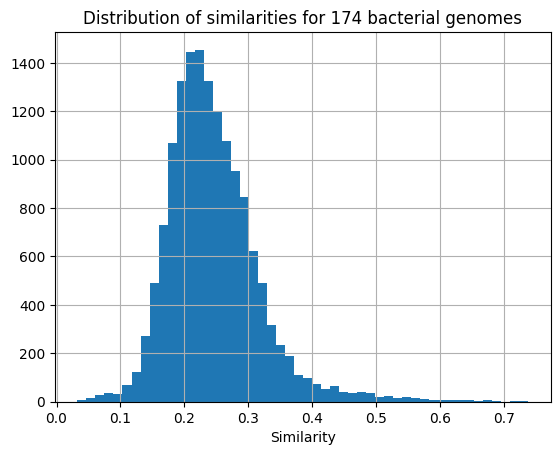

In [101]:
## Distribution of distances for initial genomes quantity (174)

upper_triangle_mask = np.triu(np.ones(genome_distance_matrix.shape), k=1).astype(bool)
result = genome_distance_matrix.where(upper_triangle_mask).stack()
result_df = result.reset_index()
result_df.columns = ['Row', 'Column', 'Value']
result_df['Value'].hist(bins=50)
plt.xlabel('Similarity')
plt.title('Distribution of similarities for 174 bacterial genomes')
plt.savefig('sim_all.png', dpi=300)

In [102]:
result_df['Value'].median()

0.23468614821634

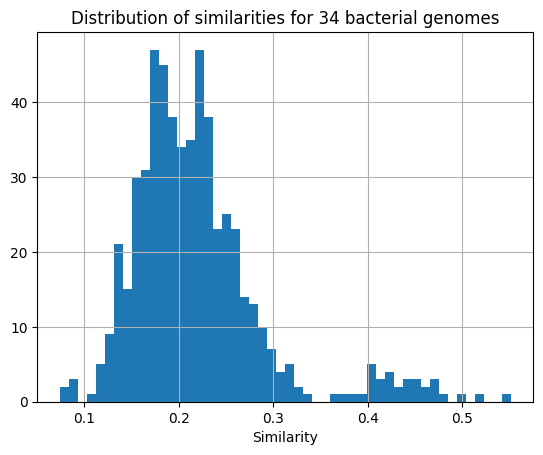

In [103]:
## Distribution of distances for selected genomes quantity (48)

upper_triangle_mask = np.triu(np.ones(genome_distance_matrix_selected.shape), k=1).astype(bool)
result = genome_distance_matrix_selected.where(upper_triangle_mask).stack()
result_df = result.reset_index()
result_df.columns = ['Row', 'Column', 'Value']
result_df['Value'].hist(bins=50)
plt.xlabel('Similarity')
plt.title('Distribution of similarities for 34 bacterial genomes')
plt.savefig('sim_selected.png', dpi=300)
# I would expect 3 agregates of bacteria based on this plot

In [104]:
result_df['Value'].median()

0.207748637387999

In [105]:
len(result_df['Value'])

561

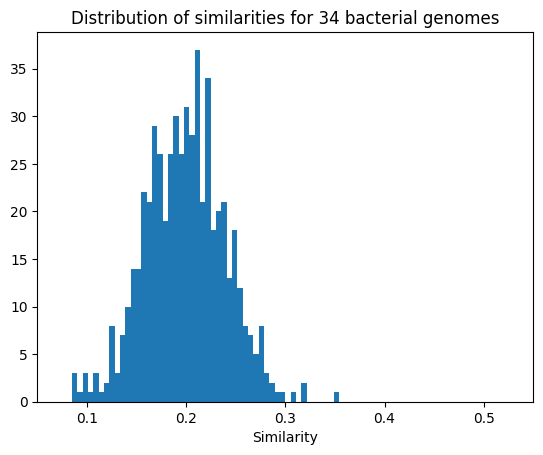

In [106]:
## Random coefficients

random_sample = np.random.normal(0.2, 0.04, len(result_df['Value']))

plt.hist(random_sample, bins=50)
plt.xlabel('Similarity')
plt.xlim((0.05, 0.55))
plt.title('Distribution of similarities for 34 bacterial genomes')
plt.savefig('sim_random.png', dpi=300)

genome_distance_matrix_random = genome_distance_matrix_selected.copy()

lower_triangle_indices = np.tril_indices(34, -1)
genome_distance_matrix_random.values[lower_triangle_indices] = random_sample

# Mirror the values to the upper triangle
genome_distance_matrix_random.values.T[lower_triangle_indices] = random_sample

# Save matrices to further display them as heatmaps
genome_distance_matrix_random.to_csv("MATRIX_b_rnd_true.tsv", sep='\t')
genome_distance_matrix_random.to_csv("MATRIX_v_b_rnd_true.tsv", sep='\t')

rnd_upper_triangle_mask = np.triu(np.ones(genome_distance_matrix_random.shape), k=1).astype(bool)
result_random = genome_distance_matrix_random.where(rnd_upper_triangle_mask).stack()
result_random_df = result_random.reset_index()
result_random_df.columns = ['Row', 'Column', 'Value']

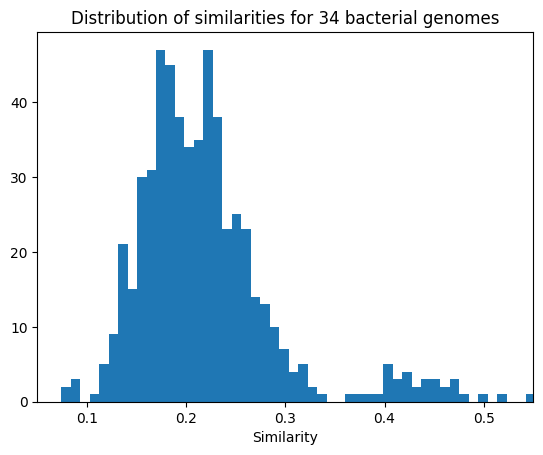

In [107]:
## Re-shuffle coefficients (same as GT but re-shuffled)

upper_triangle_mask = np.triu(np.ones(genome_distance_matrix_selected.shape), k=1).astype(bool)
_result = genome_distance_matrix_selected.where(upper_triangle_mask).stack()
_result_df = _result.reset_index()
_result_df.columns = ['Row', 'Column', 'Value']
reshuffled_sample = np.asarray(_result_df['Value'])

np.random.shuffle(reshuffled_sample)
plt.hist(reshuffled_sample, bins=50)
plt.xlabel('Similarity')
plt.xlim((0.05, 0.55))
plt.title('Distribution of similarities for 34 bacterial genomes')
plt.savefig('sim_reshuffled.png', dpi=300)

genome_distance_matrix_reshuffled = genome_distance_matrix_selected.copy()

lower_triangle_indices = np.tril_indices(34, -1)
genome_distance_matrix_reshuffled.values[lower_triangle_indices] = reshuffled_sample

# Mirror the values to the upper triangle
genome_distance_matrix_reshuffled.values.T[lower_triangle_indices] = reshuffled_sample

# Save matrices to further display them as heatmaps
genome_distance_matrix_reshuffled.to_csv("MATRIX_b_reshuffled.tsv", sep='\t')
genome_distance_matrix_reshuffled.to_csv("MATRIX_v_b_reshuffled.tsv", sep='\t')

rnd_upper_triangle_mask = np.triu(np.ones(genome_distance_matrix_reshuffled.shape), k=1).astype(bool)
result_reshuffled = genome_distance_matrix_reshuffled.where(rnd_upper_triangle_mask).stack()
result_reshuffled_df = result_reshuffled.reset_index()
result_reshuffled_df.columns = ['Row', 'Column', 'Value']

In [108]:
genome_distance_matrix_reshuffled.head()

,D300423:bin_000011,D300423:bin_000014,D300431:bin_000017,D300432:bin_000002,D300433:bin_000005,D300433:bin_000009,D300442:bin_000011,D300444:bin_000010,D300444:bin_000011,D300446:bin_000001,...,D300513:bin_000002,D300514:bin_000001,D300514:bin_000005,D300519:bin_000004,D300522:bin_000007,D300525:bin_000012,TG2_35:bin_000003,TG2_35:bin_000021,TG5_21:bin_000003,TG5_21:bin_000004
D300423:bin_000011,0.000000,0.152400,0.193470,0.288119,0.116899,0.168718,0.229174,0.228135,0.518928,0.130616,...,0.218411,0.177225,0.438181,0.156549,0.224985,0.174097,0.223663,0.249624,0.200665,0.199566
D300423:bin_000014,0.152400,0.000000,0.282855,0.190417,0.190829,0.145334,0.265642,0.439924,0.210913,0.273100,...,0.232960,0.224599,0.290998,0.289994,0.450103,0.232178,0.151006,0.287024,0.171962,0.179481
D300431:bin_000017,0.193470,0.282855,0.000000,0.250561,0.213569,0.229585,0.190152,0.174060,0.183332,0.313975,...,0.239580,0.151322,0.197252,0.215722,0.231189,0.148581,0.140023,0.183998,0.255485,0.244892
D300432:bin_000002,0.288119,0.190417,0.250561,0.000000,0.263284,0.229620,0.190837,0.178705,0.194058,0.249773,...,0.167026,0.211129,0.176736,0.178442,0.167167,0.083977,0.249790,0.230721,0.170873,0.123906
D300433:bin_000005,0.116899,0.190829,0.213569,0.263284,0.000000,0.164011,0.272599,0.266415,0.224989,0.127014,...,0.244457,0.203655,0.160772,0.255861,0.399183,0.182271,0.238901,0.205692,0.174562,0.195944


In [109]:
genome_distance_matrix_random.head()

,D300423:bin_000011,D300423:bin_000014,D300431:bin_000017,D300432:bin_000002,D300433:bin_000005,D300433:bin_000009,D300442:bin_000011,D300444:bin_000010,D300444:bin_000011,D300446:bin_000001,...,D300513:bin_000002,D300514:bin_000001,D300514:bin_000005,D300519:bin_000004,D300522:bin_000007,D300525:bin_000012,TG2_35:bin_000003,TG2_35:bin_000021,TG5_21:bin_000003,TG5_21:bin_000004
D300423:bin_000011,0.000000,0.156872,0.213318,0.138885,0.223104,0.223336,0.203131,0.201626,0.213315,0.237090,...,0.208804,0.189099,0.159455,0.229880,0.202980,0.156182,0.137146,0.185851,0.208801,0.234039
D300423:bin_000014,0.156872,0.000000,0.217148,0.214725,0.163111,0.179497,0.277713,0.190438,0.195314,0.152990,...,0.155630,0.174437,0.202276,0.211321,0.173922,0.171205,0.189889,0.211525,0.239395,0.223501
D300431:bin_000017,0.213318,0.217148,0.000000,0.196408,0.157553,0.169346,0.197626,0.190717,0.198774,0.175299,...,0.253337,0.164045,0.252425,0.162349,0.228483,0.149839,0.213370,0.241173,0.167741,0.144226
D300432:bin_000002,0.138885,0.214725,0.196408,0.000000,0.168206,0.225660,0.251280,0.237394,0.222853,0.168965,...,0.176021,0.274365,0.165270,0.147251,0.200856,0.186043,0.215891,0.206486,0.171074,0.158876
D300433:bin_000005,0.223104,0.163111,0.157553,0.168206,0.000000,0.176063,0.221833,0.171918,0.266603,0.099160,...,0.145192,0.210721,0.154996,0.223429,0.231747,0.188456,0.260016,0.267566,0.306849,0.207251


In [110]:
genome_distance_matrix_selected.head()

,D300423:bin_000011,D300423:bin_000014,D300431:bin_000017,D300432:bin_000002,D300433:bin_000005,D300433:bin_000009,D300442:bin_000011,D300444:bin_000010,D300444:bin_000011,D300446:bin_000001,...,D300513:bin_000002,D300514:bin_000001,D300514:bin_000005,D300519:bin_000004,D300522:bin_000007,D300525:bin_000012,TG2_35:bin_000003,TG2_35:bin_000021,TG5_21:bin_000003,TG5_21:bin_000004
D300423:bin_000011,0.000000,0.224301,0.254414,0.247078,0.220053,0.209154,0.250312,0.231533,0.249325,0.250310,...,0.244459,0.260908,0.233175,0.249049,0.249110,0.215048,0.202404,0.236447,0.223392,0.278987
D300423:bin_000014,0.224301,0.000000,0.153843,0.273721,0.205369,0.245422,0.246117,0.262410,0.183427,0.166807,...,0.196433,0.211129,0.222761,0.239580,0.231798,0.227166,0.185352,0.228361,0.170905,0.237592
D300431:bin_000017,0.254414,0.153843,0.000000,0.297513,0.251253,0.263541,0.257828,0.252499,0.185060,0.240853,...,0.264344,0.273491,0.234721,0.263446,0.286938,0.271484,0.236828,0.242088,0.222215,0.274933
D300432:bin_000002,0.247078,0.273721,0.297513,0.000000,0.151950,0.157377,0.218759,0.210830,0.272599,0.257003,...,0.176515,0.171769,0.199918,0.206931,0.149989,0.218411,0.199566,0.196503,0.190417,0.213651
D300433:bin_000005,0.220053,0.205369,0.251253,0.151950,0.000000,0.152406,0.190152,0.183495,0.224599,0.242659,...,0.161475,0.116899,0.160779,0.167167,0.148528,0.190837,0.167026,0.194667,0.183321,0.176524


In [125]:
###########################################
SHIFT = 3 # 3 -- bac + villi; 1 -- bac only
###########################################

result_df_write = result_df.copy()
result_random_df_write = result_random_df.copy()
result_reshuffled_df_write = result_reshuffled_df.copy()

particle_types = dict(zip(list(genome_distance_matrix_selected.index), list(range(SHIFT, genome_distance_matrix_selected.shape[0] + SHIFT))))

result_df_write['Row'] = list(map(lambda x: particle_types[x], result_df_write['Row']))
result_df_write['Column'] = list(map(lambda x: particle_types[x], result_df_write['Column']))
result_df_write['Value'] = list(map(lambda x: format(1 / x / 10e5, '.15f'), result_df_write['Value']))
# 10e5

result_random_df_write['Row'] = list(map(lambda x: particle_types[x], result_random_df_write['Row']))
result_random_df_write['Column'] = list(map(lambda x: particle_types[x], result_random_df_write['Column']))
result_random_df_write['Value'] = list(map(lambda x: format(1 / x / 10e5, '.15f'), result_random_df_write['Value']))
# 10e5

result_reshuffled_df_write['Row'] = list(map(lambda x: particle_types[x], result_reshuffled_df_write['Row']))
result_reshuffled_df_write['Column'] = list(map(lambda x: particle_types[x], result_reshuffled_df_write['Column']))
result_reshuffled_df_write['Value'] = list(map(lambda x: format(1 / x / 10e5, '.15f'), result_reshuffled_df_write['Value']))
# 10e5

# Write pair coefficients
bacteria_size = "${bac_size}" # At the moment all bacteria have the same size and mass
identical_limit = "${diff_bac_cf}" # distance limit for identical particles

fname = 'PAIR_COEFS_b_gt.txt' if SHIFT == 1 else 'PAIR_COEFS_v_b_gt.txt'
with open(fname, 'w') as f:
    for i, row in result_df_write.iterrows():
        f.write(f"pair_coeff {row['Row']} {row['Column']}\t{row['Value']}\t{bacteria_size}\t{identical_limit}\n")

fname = 'PAIR_COEFS_b_rnd.txt' if SHIFT == 1 else 'PAIR_COEFS_v_b_rnd.txt'
with open(fname, 'w') as f:
    for i, row in result_random_df_write.iterrows():
        f.write(f"pair_coeff {row['Row']} {row['Column']}\t{row['Value']}\t{bacteria_size}\t{identical_limit}\n")

fname = 'PAIR_COEFS_b_reshuffled.txt' if SHIFT == 1 else 'PAIR_COEFS_v_b_reshuffled.txt'
with open(fname, 'w') as f:
    for i, row in result_reshuffled_df_write.iterrows():
        f.write(f"pair_coeff {row['Row']} {row['Column']}\t{row['Value']}\t{bacteria_size}\t{identical_limit}\n")

In [126]:
## Identical bacteria coefficients (maximum * 10 -- for each of three coefficient set)

print("GT: {:.14f}".format(max([float(x) for x in result_df_write.Value]) * 10))
print("Random: {:.14f}".format(max([float(x) for x in result_random_df_write.Value]) * 10))
print("Shuffled: {:.14f}".format(max([float(x) for x in result_reshuffled_df_write.Value]) * 10))

GT: 0.00013497191736
Random: 0.00011777992581
Shuffled: 0.00013497191736


In [127]:
## Villi-bacteria coefficients (should be all the same in all three cases -- maximum * 10 for the GT scenario)

print("{:.14f}".format(max([float(x) for x in result_df_write.Value]) * 10))

0.00013497191736


In [174]:
base_coef = 1 / result_df['Value'].min() / 1e6 # For the particles of identical types
# base_coef = 10

In [175]:
result_df['Value'].min()

0.0740894861360671

In [176]:
base_coef

1.3497191735997147e-05

In [177]:
base_coef = 1 / result_df['Value'].min() / 10e6
base_coef

1.3497191735997147e-06

In [179]:
result_df

,Row,Column,Value
0,1,2,0.000004458304815
1,1,3,0.000003930600137
2,1,4,0.000004047302074
3,1,5,0.000004544363609
4,1,6,0.000004781156452
...,...,...,...
556,31,33,0.000005480901298
557,31,34,0.000004340564218
558,32,33,0.000005037013691
559,32,34,0.000004943190002


In [180]:
result_random_df

,Row,Column,Value
0,1,2,0.000005544485635
1,1,3,0.000003473527025
2,1,4,0.000004707697908
3,1,5,0.000006111719622
4,1,6,0.000009098364340
...,...,...,...
556,31,33,0.000004200137369
557,31,34,0.000006360152035
558,32,33,0.000003900206764
559,32,34,0.000004225065020


In [181]:
import matplotlib.pyplot as plt

(array([ 2.,  1.,  4.,  7.,  7.,  8.,  1.,  3.,  0.,  0.,  3.,  5.,  4.,
        10., 10., 16., 16., 16., 20., 15., 19., 28., 28., 24., 16., 23.,
        17., 17., 19., 15., 20., 20., 21., 15., 14., 14., 11.,  6.,  8.,
        12.,  8.,  4.,  5.,  5.,  3.,  5.,  5.,  6.,  3.,  3.,  3.,  2.,
         2.,  1.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.81271230e-06, 1.92955709e-06, 2.04640189e-06, 2.16324668e-06,
        2.28009148e-06, 2.39693627e-06, 2.51378106e-06, 2.63062586e-06,
        2.74747065e-06, 2.86431545e-06, 2.98116024e-06, 3.09800504e-06,
        3.21484983e-06, 3.33169462e-06, 3.44853942e-06, 3.56538421e-06,
        3.68222901e-06, 3.79907380e-06, 3.91591860e-06, 4.03276339e-06,
        4.14960819e-06, 4.26645298e-06, 4.38329777e-06, 4.50014257e-06,
  

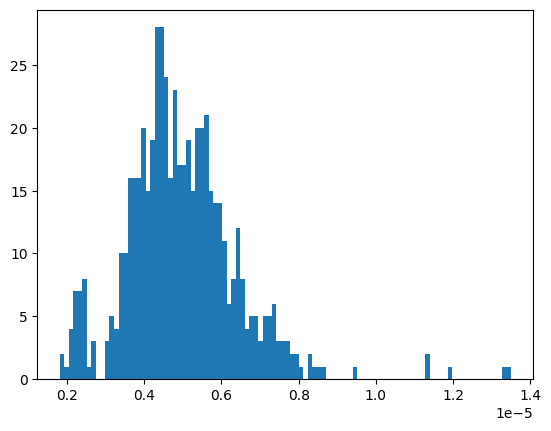

In [182]:
plt.hist([float(x) for x in result_df['Value']], bins=100)

(2.0000000000000003e-06, 1.4e-05)

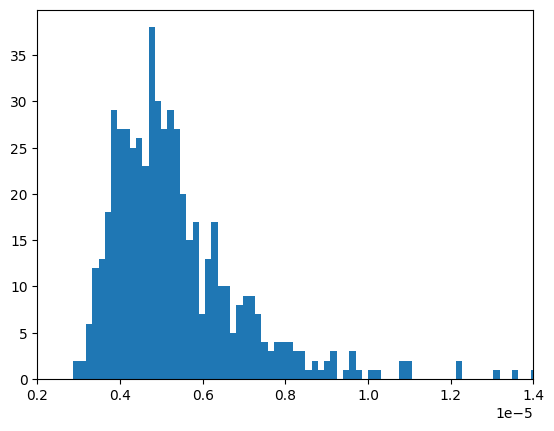

In [183]:
plt.hist([float(x) for x in result_random_df['Value']], bins=100)
plt.xlim((0.2*1e-5, 1.4*1e-5))

### Write coefficients

In [184]:
# Bacteria-Villi coefficients (fixed)

energy_bac_vil = 0.000013497191736
size_bac_vil = 2.06
limit_bac_vil = 4.0

identical_pair_fmt = f"3*{genome_distance_matrix_selected.shape[0] + 2}"
print(f"pair_coeff 1*2 {identical_pair_fmt}\t{energy_bac_vil}\t{size_bac_vil}\t{limit_bac_vil}")

pair_coeff 1*2 3*36	1.3497191736e-05	2.06	4.0


In [185]:
# Identical coefficients

bacteria_size = 0.000013497191736 # At the moment all bacteria have the same size and mass
identical_limit = 4.0 # distance limit for identical particles

identical_pair_fmt = f"3*{genome_distance_matrix_selected.shape[0] + 2}"
print(f"pair_coeff {identical_pair_fmt} {identical_pair_fmt}\t{base_coef:.1f}\t{bacteria_size}\t{identical_limit}")

pair_coeff 3*36 3*36	0.0	1.3497191736e-05	4.0


In [186]:
# Pair coefficients

bacteria_size = "${bac_size}" # At the moment all bacteria have the same size and mass
identical_limit = "${diff_bac_cf}" # distance limit for identical particles

with open('PAIR_COEFS_b_gt.txt', 'w') as f:
    for i, row in result_df.iterrows():
        f.write(f"pair_coeff {row['Row']} {row['Column']}\t{row['Value']}\t{bacteria_size}\t{identical_limit}\n")


with open('PAIR_COEFS_b_rnd.txt', 'w') as f:
    for i, row in result_random_df.iterrows():
        f.write(f"pair_coeff {row['Row']} {row['Column']}\t{row['Value']}\t{bacteria_size}\t{identical_limit}\n")

### calculate bacteria volume

In [190]:
import numpy as np

In [214]:
r_bac = 0.06
height_bac_space = 20
num_bac = 298120 # 119247 298120

vol_space = 40 * 40 * height_bac_space
v_bac = (4 / 3) * np.pi * (r_bac ** 3)
v_bac_tot = v_bac * num_bac
v_bac_share = v_bac_tot / vol_space

In [215]:
v_bac_share # 298120

0.0084291444169937

In [183]:
v_bac_share # 119247

0.0033716294924635974

In [216]:
r_bac = 0.06
height_bac_space = 3
num_bac = 119247 # 119247 298120

vol_space = 40 * 40 * height_bac_space
v_bac = (4 / 3) * np.pi * (r_bac ** 3)
v_bac_tot = v_bac * num_bac
v_bac_share = v_bac_tot / vol_space

In [206]:
v_bac_share

0.15676128462392586

In [217]:
v_bac_share

0.022477529949757317

In [218]:
3/0.06

50.0